In [109]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt

In [110]:
data = pd.read_csv('Customers.csv')

In [111]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [112]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [113]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [114]:
X = data.iloc[:,3:]

In [115]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [116]:
X_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [117]:
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

In [118]:
Y=data[['Gender' , 'Spending Score (1-100)']]

In [119]:
scaler = StandardScaler()
Y_scaled = scaler.fit_transform(Y)

In [120]:
Y_scaled

array([[ 1.12815215, -0.43480148],
       [ 1.12815215,  1.19570407],
       [-0.88640526, -1.71591298],
       [-0.88640526,  1.04041783],
       [-0.88640526, -0.39597992],
       [-0.88640526,  1.00159627],
       [-0.88640526, -1.71591298],
       [-0.88640526,  1.70038436],
       [ 1.12815215, -1.83237767],
       [-0.88640526,  0.84631002],
       [ 1.12815215, -1.4053405 ],
       [-0.88640526,  1.89449216],
       [-0.88640526, -1.36651894],
       [-0.88640526,  1.04041783],
       [ 1.12815215, -1.44416206],
       [ 1.12815215,  1.11806095],
       [-0.88640526, -0.59008772],
       [ 1.12815215,  0.61338066],
       [ 1.12815215, -0.82301709],
       [-0.88640526,  1.8556706 ],
       [ 1.12815215, -0.59008772],
       [ 1.12815215,  0.88513158],
       [-0.88640526, -1.75473454],
       [ 1.12815215,  0.88513158],
       [-0.88640526, -1.4053405 ],
       [ 1.12815215,  1.23452563],
       [-0.88640526, -0.7065524 ],
       [ 1.12815215,  0.41927286],
       [-0.88640526,

In [121]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


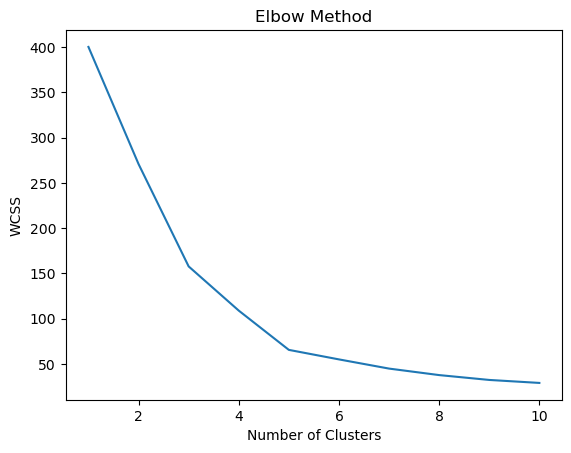

In [122]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [123]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [124]:
data['Cluster'] = kmeans.labels_

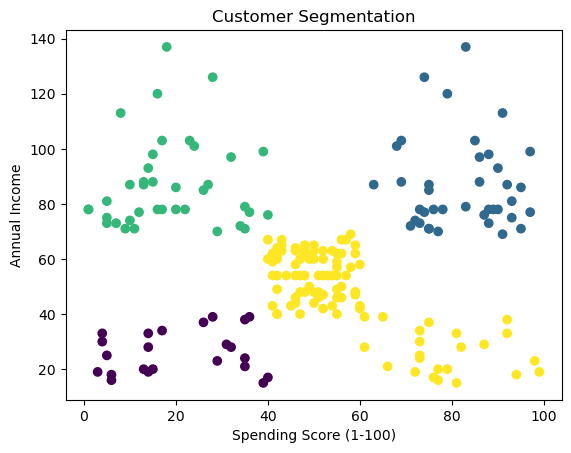

In [125]:
plt.scatter(X['Spending Score (1-100)'], X['Annual Income (k$)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income')
plt.title('Customer Segmentation')
plt.show()

In [126]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(Y_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


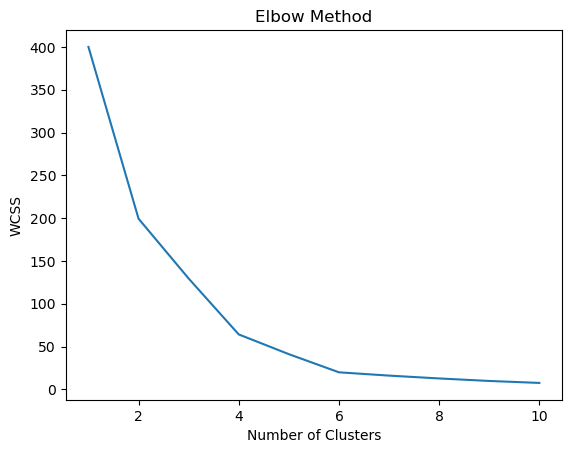

In [127]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [128]:
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=42)
kmeans.fit(Y_scaled)

KMeans(n_clusters=10, random_state=42)

In [129]:
data['Cluster1'] = kmeans.labels_

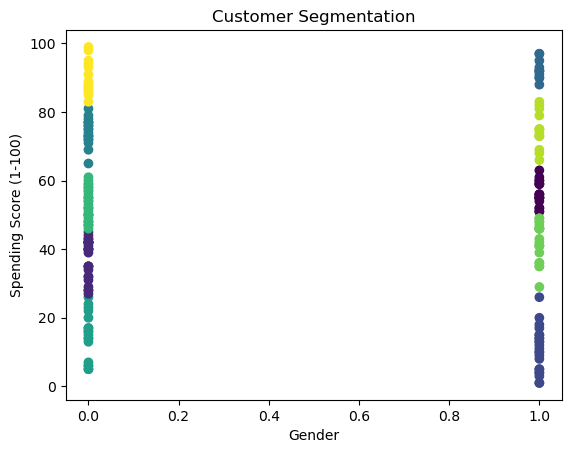

In [130]:
plt.scatter(Y['Gender'] ,Y['Spending Score (1-100)'] , c=data['Cluster1'], cmap='viridis')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation')
plt.show()

In [131]:
data.head(15)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster1
0,1,1,19,15,39,0,7
1,2,1,21,15,81,3,8
2,3,0,20,16,6,0,5
3,4,0,23,16,77,3,4
4,5,0,31,17,40,0,1
5,6,0,22,17,76,3,4
6,7,0,35,18,6,0,5
7,8,0,23,18,94,3,9
8,9,1,64,19,3,0,2
9,10,0,30,19,72,3,4
